# Summative assessment

This is your summative assignment for the Machine Learning introduction. You should solve it on your own, this is an individual assessment, not a group assessment!

All plots in this notebook need to have proper labels. 

We need to import these package:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas

## Analysis

For this exercise we will use the data stored in the file `/data/data.csv`. We read it into a `pandas` dataframe here. It contains five features and one label.

In [14]:
df = pandas.read_csv('/data/data.csv')

We can have a look at the first 10 entries:

In [15]:
df[:10]

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,label
0,2.157919,-2.181662,1.408201,-8.003931,-8.430122,1
1,-2.432552,27.755624,13.899392,43.369627,55.297585,3
2,4.485993,13.287725,-10.408510,32.854271,14.481775,2
3,7.858718,13.267945,-27.900040,32.163875,18.238438,2
4,6.126736,13.061730,10.952840,11.127656,11.987919,1
5,0.906600,30.904229,-24.291929,25.269268,11.676879,2
6,-17.353673,17.310068,21.777346,37.772644,36.306689,3
7,17.982372,13.221800,-3.230875,29.738079,13.245530,2
8,10.232101,27.880768,-11.100155,40.698209,19.759479,2
9,8.960869,11.736282,-0.270123,7.500216,8.897399,2


**TASK 1:**

Standardize the inputs and prepare a training and test sample with ratio 2:1 using `train_test_split`. Use ` random_state=42` to make your result easily comparable. We will train our models on the training set, and keep the test set to compare the models at the end of this notebook. [2 marks]


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# use random_state=42 in train_test_split!

df = np.array(df)
scaler = StandardScaler()
data = scaler.fit_transform(df[:,:5])
X_train, X_test, y_train, y_test = train_test_split(data, df[:,5], test_size = 1/3, random_state = 42)



## Logistic regression

**TASK 2:**

Use a logistic regression model to classify the data. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [5 marks]


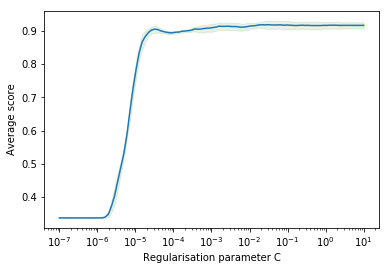

In [17]:
from sklearn.model_selection import GridSearchCV


C_values = np.logspace(-7, 1, 100)
parameters = {'C':C_values}
Lr = LogisticRegression(solver='lbfgs', multi_class = 'auto')
Rsearch = GridSearchCV(Lr, parameters, cv=5)
Rsearch.fit(X_train, y_train)
Rsearch.cv_results_.keys()
scores = Rsearch.cv_results_['mean_test_score']
scores_std = Rsearch.cv_results_['std_test_score']
plt.fill_between(C_values, scores - scores_std,
                 scores + scores_std, alpha=0.1, color="g")
plt.plot(C_values, scores)
plt.xscale('log')
plt.xlabel('Regularisation parameter C')
plt.ylabel('Average score');


**TASK 3:**

Using the best value for the regularisation parameter plot the learning curve (i.e. the score as a function of the number of training samples) for training and validation set including uncertainty estimates using 5-fold cross validation. You may want to use `sklean`'s `learning_curve`. [5 marks]



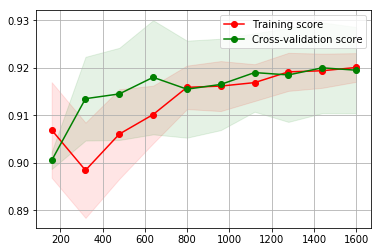

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(Rsearch.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")

## k-neighbours

**TASK 4:**

Use a k-neighbours model to classify the data. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score. [4 marks]


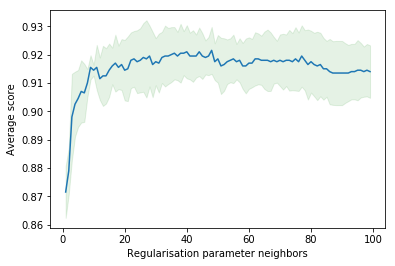

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# YOUR CODE HERE
neighbors = range(1, 100, 1)
parameters = {'n_neighbors':neighbors}
Knn = KNeighborsClassifier()
RsearchKNN = GridSearchCV(Knn, parameters, cv=5)
RsearchKNN.fit(X_train, y_train)
RsearchKNN.cv_results_.keys()
scores_knn = RsearchKNN.cv_results_['mean_test_score']
scores_std_knn = RsearchKNN.cv_results_['std_test_score']
plt.fill_between(neighbors, scores_knn - scores_std_knn,
                 scores_knn + scores_std_knn, alpha=0.1, color="g")
plt.plot(neighbors, scores_knn)
plt.xlabel('Regularisation parameter neighbors')
plt.ylabel('Average score');


**TASK 5:**

Using the best value for the regularisation parameter plot the learning curves for training and validation set including uncertainty estimates using 5-fold cross validation. [5 marks]


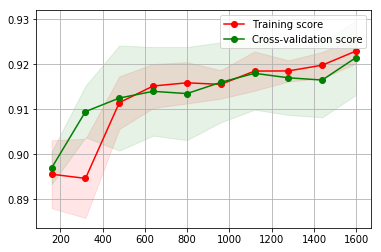

In [23]:
train_sizes, train_scores, test_scores = learning_curve(RsearchKNN.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")

## Neural network

**TASK 6:**

Use a neural network model to classify the data. Use the `sklearn.MLPClassifier` with one layer of logistic activation units. Plot the scores as a function of the number of hidden units `nHidden = [5,8,10,20]` and an estimate of the uncertainty on the score. [4 marks]


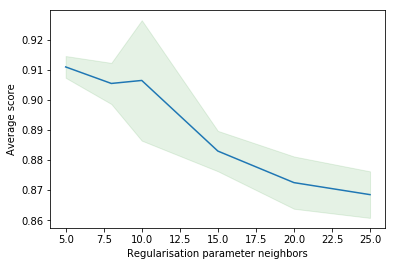

In [31]:
from sklearn.neural_network import MLPClassifier

nHiddenUnits = [5,8,10,15,20,25]
parameters = {'hidden_layer_sizes':nHiddenUnits}
MLP = MLPClassifier(activation = "logistic", max_iter=300, solver="lbfgs")
RsearchMLP = GridSearchCV(MLP, parameters, cv=5)
RsearchMLP.fit(X_train, y_train)
RsearchMLP.cv_results_.keys()
scores_MLP = RsearchMLP.cv_results_['mean_test_score']
scores_std_MLP = RsearchMLP.cv_results_['std_test_score']
plt.fill_between(nHiddenUnits, scores_MLP - scores_std_MLP,
                 scores_MLP + scores_std_MLP, alpha=0.1, color="g")
plt.plot(nHiddenUnits, scores_MLP)
plt.xlabel('Regularisation parameter neighbors')
plt.ylabel('Average score');


# YOUR CODE HERE

**TASK 7:**

Using the best value for the number of hidden units plot the learning curves for training and validation set including uncertainty estimates using 5-fold cross validation. [5 marks]


[[0.95597484 0.93081761 0.98113208 0.96855346 0.96855346]
 [0.97492163 0.92476489 0.94984326 0.93103448 0.95611285]
 [0.96242171 0.93319415 0.92275574 0.95615866 0.95615866]
 [0.93896714 0.93270736 0.94835681 0.94366197 0.93270736]
 [0.94242804 0.92490613 0.95494368 0.9436796  0.94242804]
 [0.93743483 0.93013556 0.93222106 0.93430657 0.93117831]
 [0.93565684 0.92493298 0.93297587 0.93208222 0.93118856]
 [0.93197811 0.92337764 0.93041439 0.93275997 0.93432369]
 [0.9305073  0.92703266 0.93120222 0.92981237 0.92633773]
 [0.92870544 0.92307692 0.92620388 0.92995622 0.92870544]]


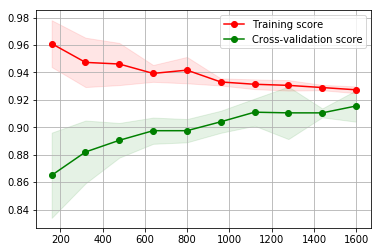

In [25]:
train_sizes, train_scores, test_scores = learning_curve(RsearchMLP.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
print(train_scores)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")

## Comparing the models

**TASK 8:**

Collect in one plot the expected scores (and their uncertainties) for the three models (logistic regression, k-neighbours and neural network) that you trained so far. Show on the same plot the scores of the same models on the test set we set aside at the beginning of the notebook. [5 marks]




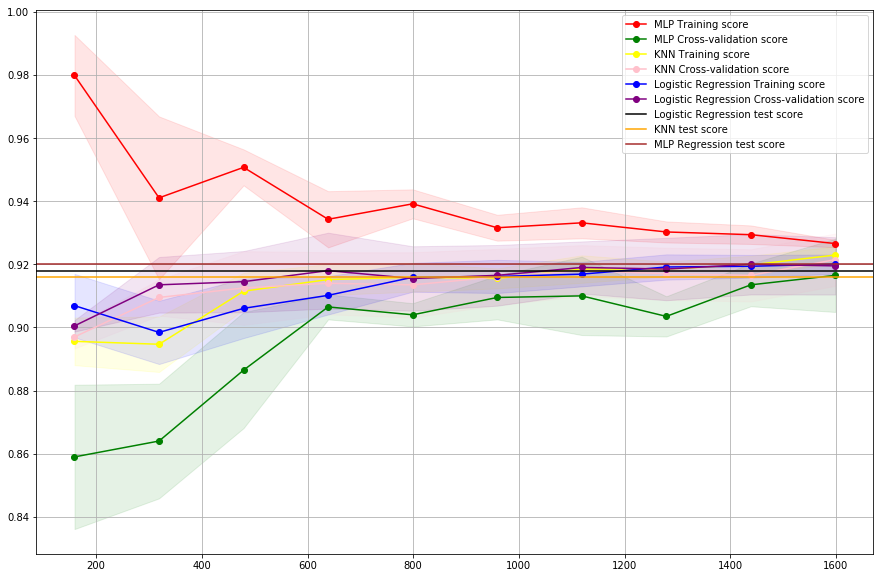

In [26]:
train_sizes, train_scores, test_scores = learning_curve(RsearchMLP.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(15, 10))
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="MLP Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="MLP Cross-validation score")

train_sizes, train_scores, test_scores = learning_curve(RsearchKNN.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="yellow")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="pink")
plt.plot(train_sizes, train_scores_mean, 'o-', color="yellow",
                 label="KNN Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="pink",
                 label="KNN Cross-validation score")

train_sizes, train_scores, test_scores = learning_curve(Rsearch.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="purple")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
                 label="Logistic Regression Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="purple",
                 label="Logistic Regression Cross-validation score")

plt.axhline(Rsearch.best_estimator_.score(X_test, y_test), color = "black", label="Logistic Regression test score")
plt.axhline(RsearchKNN.best_estimator_.score(X_test, y_test), color = "orange", label="KNN test score")
plt.axhline(RsearchMLP.best_estimator_.score(X_test, y_test), color = "brown", label="MLP Regression test score")
plt.legend(loc="best")



## Dimensionality reduction

**TASK 9: **

Use PCA to reduce the dimensionality of the input to a maximum of 5. Plot the explained variance ratio as a function of the number of reduced dimensions (i.e. eigenvectors). [4 marks]



[0.57824294 0.80287372 0.89718128 0.96780262 1.        ]


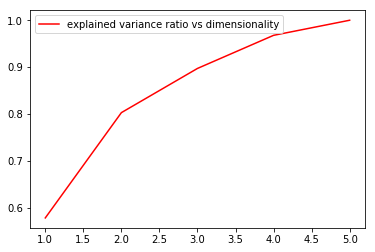

In [27]:
from sklearn.decomposition import PCA
n_components = range(1,6,1)
pca = PCA(n_components = 5)
pca.fit(data)
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_ratios)
plt.figure()
plt.plot(n_components, explained_variance_ratios, color = 'r', label = "explained variance ratio vs dimensionality")
plt.legend(loc="best")

**TASK 10:**

You should be able to see that using PCA your data becomes partially separable even in only two dimensions. Use the two largest eigenvectors of your PCA decomposition to plot the dataset in two dimensions using different colors for each class. [4 marks]



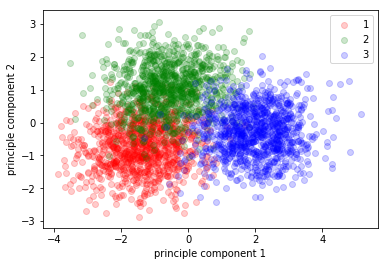

In [28]:
pca = PCA(n_components = 2)
data2D = pca.fit_transform(data)

# eig_vals, eig_vecs = np.linalg.eig(np.dot(data.T, data))
# print(eig_vecs)
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# index = np.argsort(-eig_vals)[: 2]
# target_eig_vecs = eig_vecs[:, index]
# eig_pairs.sort(key=lambda x: x[0], reverse=True)
# data2D = np.dot(target_eig_vecs.T, data.T).T


df2D = pandas.DataFrame(data2D,  columns=['feature1', 'feature2'])
df2D['Labels'] = df[:, 5]
df2D_label1 = df2D[df2D['Labels'] == 1]
df2D_label2 = df2D[df2D['Labels'] == 2]
df2D_label3 = df2D[df2D['Labels'] == 3]
df2D_label1 = np.array(df2D_label1)
df2D_label1_x = df2D_label1[:, 0]
df2D_label1_y = df2D_label1[:, 1]
df2D_label2 = np.array(df2D_label2)
df2D_label2_x = df2D_label2[:, 0]
df2D_label2_y = df2D_label2[:, 1]
df2D_label3 = np.array(df2D_label3)
df2D_label3_x = df2D_label3[:, 0]
df2D_label3_y = df2D_label3[:, 1]
plt.figure()
plt.scatter(df2D_label1_x, df2D_label1_y, color='r', alpha = 0.2, label = '1')
plt.scatter(df2D_label2_x, df2D_label2_y, color='g', alpha = 0.2, label = '2')
plt.scatter(df2D_label3_x, df2D_label3_y, color='b', alpha = 0.2, label = '3')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.legend(loc='best')

**OPTIONAL TASK (no marks)**

Plot the decision boundary in the above 2D plane for the following classifier. 

Classifier: For each input data, project the point to the hyperplane spanned by the 2 eigenvectors with the highest variance and use the neural network output of that point as the result of the classifier.

In [ ]:
# YOUR CODE HERE